Elkészíti a preprocessed.csv fájlt

In [1]:
import pandas as pd

origdf = pd.read_csv('training_data.csv')
subm = pd.read_csv('data_submission_example.csv')

df = origdf.copy()

In [7]:
df = origdf.copy()

In [74]:
df.columns

Index(['CONTRACT_ID', 'BORROWER_ID', 'CONTRACT_BANK_ID',
       'CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_FREQUENCY_TYPE',
       'CONTRACT_INCOME', 'CONTRACT_INSTALMENT_AMOUNT',
       'CONTRACT_INSTALMENT_AMOUNT_2', 'CONTRACT_INTEREST_PERIOD',
       'CONTRACT_INTEREST_RATE', 'CONTRACT_LGD', 'CONTRACT_LOAN_AMOUNT',
       'CONTRACT_LOAN_CONTRACT_TYPE', 'CONTRACT_LOAN_TO_VALUE_RATIO',
       'CONTRACT_LOAN_TYPE', 'CONTRACT_MARKET_VALUE', 'CONTRACT_MATURITY_DATE',
       'CONTRACT_MORTGAGE_LENDING_VALUE', 'CONTRACT_MORTGAGE_TYPE',
       'CONTRACT_REFINANCED', 'CONTRACT_RISK_WEIGHTED_ASSETS',
       'CONTRACT_TYPE_OF_INTEREST_REPAYMENT', 'BORROWER_BIRTH_YEAR',
       'BORROWER_CITIZENSHIP', 'BORROWER_COUNTRY', 'BORROWER_COUNTY',
       'BORROWER_TYPE_OF_CUSTOMER', 'BORROWER_TYPE_OF_SETTLEMENT',
       'TARGET_EVENT', 'TARGET_EVENT_DAY'],
      dtype='object')

Dátumokat írjuk át, toljuk el

In [26]:
# date of loan aggrement rendelkezik a legkisebb érékkel a dátumok közül, ennek a minimumát vesszük eltolásnak, ez a 0. nap # 2457024
eltolas = df['CONTRACT_DATE_OF_LOAN_AGREEMENT'].min()
df['CONTRACT_DATE_OF_LOAN_AGREEMENT'] = df['CONTRACT_DATE_OF_LOAN_AGREEMENT']-eltolas
df['TARGET_EVENT_DAY']=df['TARGET_EVENT_DAY']-eltolas
df['CONTRACT_MATURITY_DATE']=df['CONTRACT_MATURITY_DATE']-eltolas


In [76]:
valtozok=['CONTRACT_ID', 'BORROWER_ID', 'CONTRACT_BANK_ID',
       'CONTRACT_CREDIT_INTERMEDIARY', 'CONTRACT_CREDIT_LOSS',
       'CONTRACT_CURRENCY', 'CONTRACT_DATE_OF_LOAN_AGREEMENT',
       'CONTRACT_DEPT_SERVICE_TO_INCOME', 'CONTRACT_FREQUENCY_TYPE',
       'CONTRACT_INCOME','TARGET_EVENT', 'TARGET_EVENT_DAY']

In [63]:
null = df[df['BORROWER_ID'] == 'xNullx'].loc[:,valtozok] 

In [68]:
null[null['TARGET_EVENT'] == 'K']

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,TARGET_EVENT,TARGET_EVENT_DAY
550010,zBpiDDC,xNullx,c8072c06,1.0,161980.0,31,470,18.51,2f88e16c,162661.0,K,684.0
1221149,bJ7HdTA,xNullx,533b7c4a,2.0,494490.0,31,106,29.55,2f88e16c,138859.0,K,459.0
1489940,pZrAJ2ka,xNullx,2c6f5579,2.0,1246357.0,31,109,NaN,2f88e16c,NaN,K,858.0


hány esemény vana a trainben?  1602753


hány ember van összesen a trainben? 1149851


xNullx ID : 1090 személy, ezeket dobjuk el.

In [27]:
# drop if borrower_id = 'xNullx'
df = df[df['BORROWER_ID'] != 'xNullx']

In [4]:
df['BORROWER_ID'].value_counts()

BORROWER_ID
akvNVipI    24
qW3B+pgb    22
95IQewTL    19
JARtY3P1    18
Q6VZPSc7    16
            ..
a9uXz+NW     1
S3vPKrqC     1
BBR72Uj7     1
EYYsTEC/     1
Dxng1cGs     1
Name: count, Length: 1149850, dtype: int64

Nézzük meg a legtöbb szerződéssel rendelkező alanyt

In [40]:
# print out the akvNVipI borrower_id number of rows
df[df['BORROWER_ID'] == 'akvNVipI']


,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
453943,89mnNuD3,akvNVipI,04f86595,2.0,4956.0,31,2458033,12.79,479a2e13,187633.0,...,74.38,100003.0,1225.0,98.0,98.0,107.0,A,4.0,-,NaN
1351229,-6bgbLON,akvNVipI,04f86595,2.0,333.0,31,2457631,9.25,479a2e13,160350.0,...,75.31,100003.0,1225.0,98.0,98.0,107.0,A,NaN,-,NaN


In [41]:
# if more than 10 columns are null, drop the row  
df = df[df.isnull().sum(axis=1) <= 10]

In [6]:
df.to_csv('preprocessed_nodummy.csv', index=False)

In [80]:
df  # 1504811

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,28,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,19,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,67,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,22,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,57,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585990,MrbrQn-h,gdktgzFC,1d42bbf5,2.0,6272.0,31,474,22.52,479a2e13,414567.0,...,0.96,0.0,1243.0,98.0,98.0,188.0,A,NaN,-,NaN
1585991,ruA1KbKk,o6NIFmOQ,1d42bbf5,2.0,386.0,31,140,45.48,479a2e13,135768.0,...,0.99,0.0,1229.0,98.0,98.0,34.0,A,NaN,-,NaN
1585992,hd96e-ZF,WE3guS88,caa130b5,1.0,242.0,31,557,57.64,479a2e13,123756.0,...,166.06,100003.0,1218.0,98.0,98.0,169.0,A,3.0,-,NaN
1585993,hd96e-ZF,wqff0u+1,caa130b5,1.0,242.0,31,557,57.64,479a2e13,123756.0,...,166.06,100003.0,1218.0,98.0,98.0,169.0,A,3.0,-,NaN


Ezután a legtöbb szerződéssel a qW3B+pgb rendelkezik

In [41]:
df[df['BORROWER_ID'] == 'qW3B+pgb']

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
8180,4cw2ZfVO,qW3B+pgb,caa130b5,1.0,103261.0,31,2457834,38.20,479a2e13,171941.0,...,160.30,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN
170047,V-mH-7KV,qW3B+pgb,caa130b5,1.0,126100.0,31,2458025,29.38,479a2e13,298913.0,...,40.82,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN
205897,Z+U30e-p,qW3B+pgb,1d42bbf5,20001.0,54343.0,31,2457862,39.86,479a2e13,165447.0,...,74.53,100003.0,1263.0,98.0,98.0,183.0,A,4.0,-,NaN
206262,KOctvJPI,qW3B+pgb,caa130b5,1.0,144246.0,31,2457886,47.49,479a2e13,169616.0,...,47.69,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN
320214,aiHPl4Ei,qW3B+pgb,caa130b5,1.0,96261.0,31,2458008,43.41,479a2e13,273795.0,...,41.44,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN
354349,RFWvoktd,qW3B+pgb,caa130b5,1.0,112101.0,31,2457982,41.05,479a2e13,276155.0,...,40.97,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN
389876,opvlrAZl,qW3B+pgb,caa130b5,1.0,95642.0,31,2457834,37.69,479a2e13,174960.0,...,157.70,140002.0,1263.0,98.0,98.0,183.0,A,4.0,-,NaN
404957,nJw1NPaF,qW3B+pgb,caa130b5,1.0,118065.0,31,2457917,48.29,479a2e13,189376.0,...,48.30,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN
490661,JUtn5sk,qW3B+pgb,caa130b5,1.0,381962.0,31,2457951,40.36,479a2e13,241665.0,...,61.80,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN
528033,QgcHRSFy,qW3B+pgb,caa130b5,1.0,138850.0,31,2457882,42.45,479a2e13,168107.0,...,48.50,140002.0,1263.0,425.0,98.0,183.0,A,4.0,-,NaN


Contract id elemzés

In [9]:
df['CONTRACT_ID'].value_counts()

CONTRACT_ID
4p88i8P0    15
itR1+5WB    15
5f-FI6dX    12
taGnw6RW    11
msT4i3Y1    11
            ..
rJ9qEpSt     1
GcTpmu3      1
mbxzmPJ5     1
4sluTzBP     1
A7F487B2     1
Name: count, Length: 1274533, dtype: int64

In [14]:
df[df['CONTRACT_ID'] == '4p88i8P0']
# get the borrower id from these columns
ids=df[df['CONTRACT_ID'] == '4p88i8P0']['BORROWER_ID'].values


In [22]:
ids

array(['8KbAr/nB', 'Fqxk5tnd', 'esDt1LsS', 'AF8fyJpJ', 'hgvpSQlM',
       'p+Ru0e54', 'zD1M7psu', 'x+ct+IYi', 'wn2BIbDx', 'UsKHs0IY',
       'gSpmhSZ6', 'yfapnQs+', 'xVw+hE4s', 'sh9Zww2/', 'YyYfYEAC'],
      dtype=object)

In [21]:
# if ids in subm get true
#nem dobhatjuk el a 4p88i8P0 contract_id-t, mert a submission-ben is szerepel
subm['BORROWER_ID'].isin(ids).value_counts()

BORROWER_ID
False    1117659
True          15
Name: count, dtype: int64

megnézni, hogy aki elbukta, annak milyen értékei voltak

In [38]:
# list all borrower_id that have a row with 'K' value in target event and at least one row with '-' value in target event


borrowers = df[df['TARGET_EVENT'] == 'K']['BORROWER_ID'].unique()

In [43]:
# list all rows that have a borrower_id in the list above
defaults = df[df['BORROWER_ID'].isin(borrowers)]

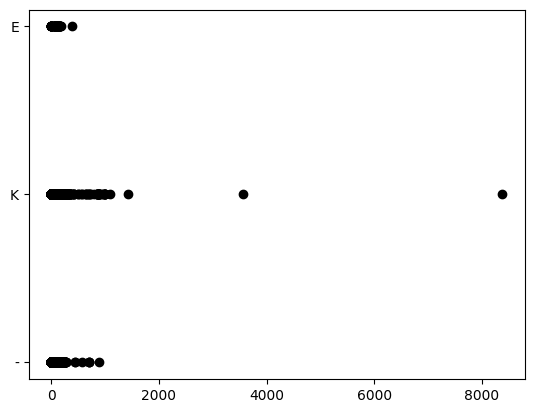

In [45]:
import matplotlib.pyplot as plt
plt.plot(defaults['CONTRACT_RISK_WEIGHTED_ASSETS'], defaults[''], 'o', color='black')

egy személy vizsgálata

In [32]:
ids_2= '9bx2qKSr','GGSYurwd'

In [33]:
subm['BORROWER_ID'].isin(ids_2).value_counts()

BORROWER_ID
False    1117674
Name: count, dtype: int64

In [37]:
df[df['BORROWER_ID'] == 'hWTbVjU6']


,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
533303,Ojk5jKl,hWTbVjU6,caa130b5,1.0,73995.0,31,91,35.81,479a2e13,157263.0,...,173.36,100003.0,1259.0,98.0,98.0,123.0,A,NaN,K,568.0


In [36]:
df[df['BORROWER_ID'] == 'F+fy2+w8']

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
138753,ZwcqYoLK,F+fy2+w8,1d42bbf5,20001.0,88215.0,31,406,49.49,479a2e13,135639.0,...,1.00,0.0,1255.0,98.0,98.0,144.0,A,7.0,K,748.0
188391,4B4XColA,F+fy2+w8,1c1c77e5,20001.0,1131128.0,31,398,40.11,479a2e13,152967.0,...,99.65,100003.0,1255.0,98.0,98.0,172.0,A,7.0,K,832.0
201187,233kZthE,F+fy2+w8,1c1c77e5,20001.0,515228.0,31,398,40.57,479a2e13,147867.0,...,99.95,100003.0,1255.0,98.0,98.0,172.0,A,7.0,K,921.0
914822,Dxn0wUPG,F+fy2+w8,1d42bbf5,20001.0,530631.0,31,299,50.35,479a2e13,144699.0,...,0.98,0.0,1255.0,98.0,98.0,144.0,A,7.0,K,743.0
1446977,9mz-7cv,F+fy2+w8,1c1c77e5,20001.0,433216.0,31,509,0.00,479a2e13,0.0,...,99.72,100003.0,1255.0,98.0,98.0,172.0,A,7.0,-,NaN


Átalakítani a string típúsú, kategórikus változókat 

In [81]:
# ne használt label encodingot, helyette one-hot encodingot vagy target encodingot 
dummy_cols_list = ['CONTRACT_BANK_ID', 'CONTRACT_FREQUENCY_TYPE', 'CONTRACT_LOAN_TYPE','BORROWER_TYPE_OF_CUSTOMER','TARGET_EVENT']
dummy_names = []

for col in dummy_cols_list:
    dummy_df = pd.get_dummies(df.loc[:, col], prefix=col, drop_first=True)
    dummy_df = dummy_df.astype(int)
    dummy_names += dummy_df.columns.tolist()
    df = pd.concat([df, dummy_df], axis=1)



In [70]:
len(dummy_names)

162

In [71]:
# save the dummy names in txt
with open('dummy_names.txt', 'w') as f:
    for item in dummy_names:
        f.write("%s\n" % item)

In [83]:
# save df to csv
df.to_csv('preprocessed.csv', index=False)

Value_counts értékek

In [32]:
df['TARGET_EVENT'].value_counts()

TARGET_EVENT
0    1548364
1      43515
2      10874
Name: count, dtype: int64

In [33]:
origdf['TARGET_EVENT'].value_counts()

TARGET_EVENT
-    1548364
E      43515
K      10874
Name: count, dtype: int64

In [4]:
origdf['BORROWER_ID'].value_counts()

BORROWER_ID
xNullx      1090
akvNVipI      24
qW3B+pgb      22
95IQewTL      19
JARtY3P1      18
            ... 
LqRn3EsW       1
odaCvCmO       1
seFkKZ2U       1
WJWtceMu       1
Dxng1cGs       1
Name: count, Length: 1149851, dtype: int64

In [30]:
# drop the ID-s

no_id_df = df.drop(['CONTRACT_ID','BORROWER_ID'], axis=1)

<Axes: >

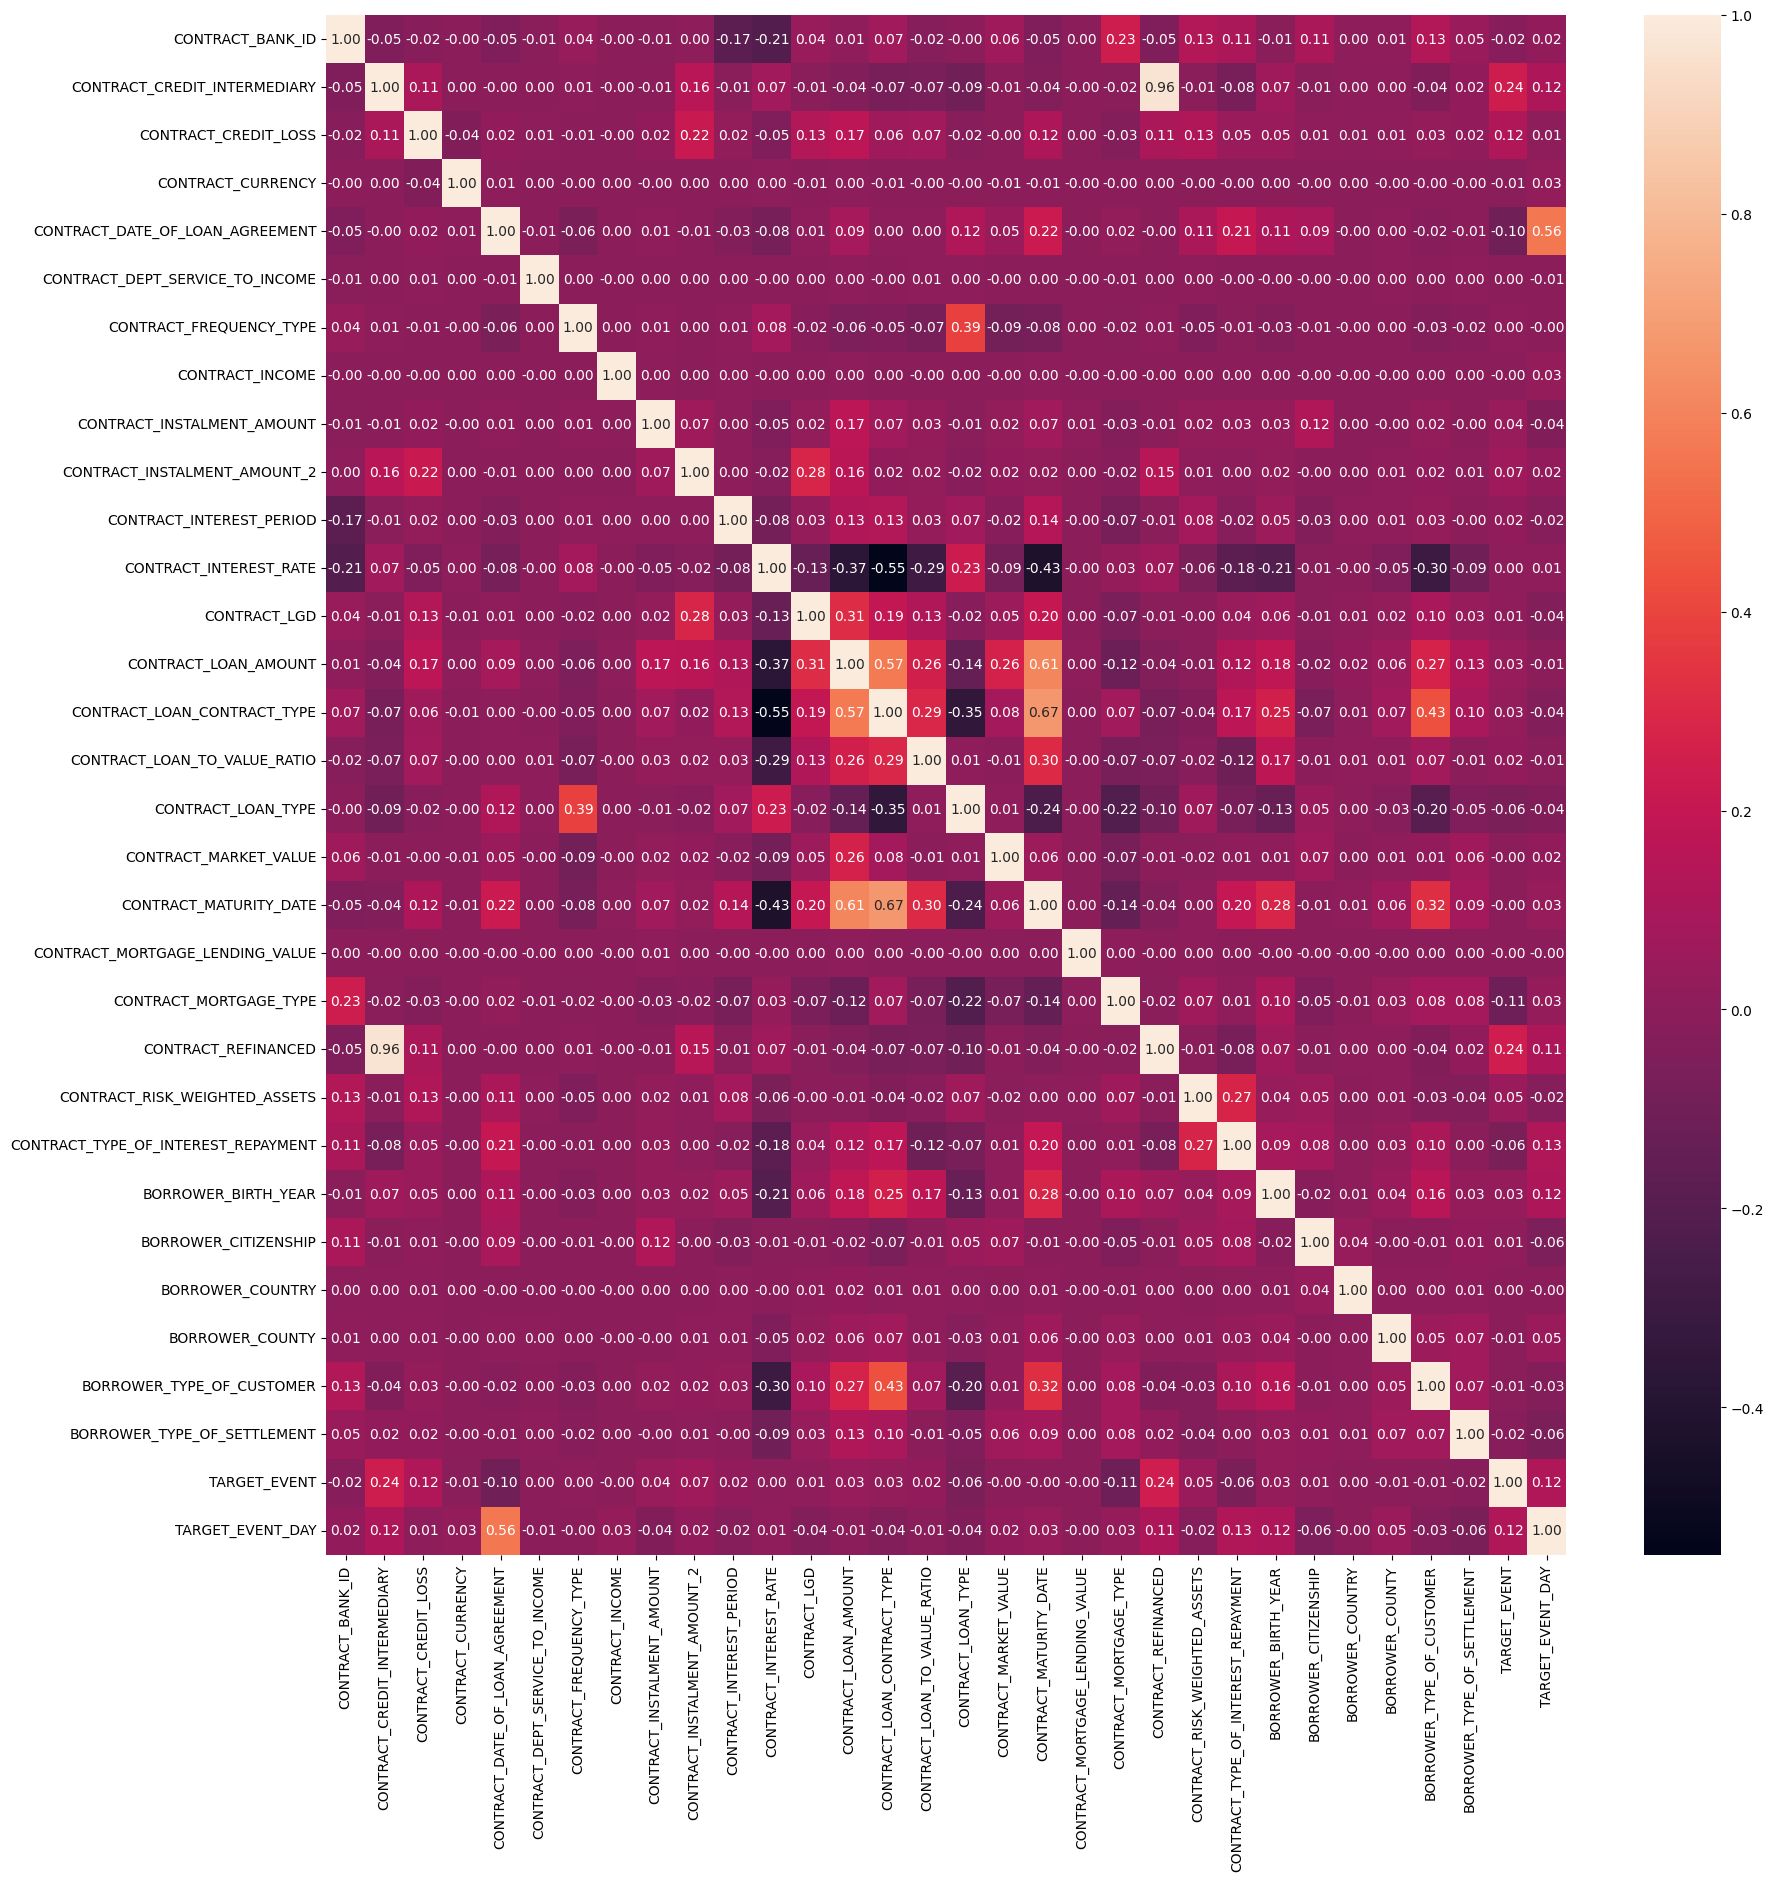

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = no_id_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f')

In [37]:
# print out the column pairs where is the correlation bigger than 0.1
# the pairs are not the same, because the correlation matrix is symmetric
# and we only need the upper triangle
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.3:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            print(colname1, colname2, corr.iloc[i, j])



CONTRACT_LOAN_AMOUNT CONTRACT_INTEREST_RATE -0.37246064270420504
CONTRACT_LOAN_AMOUNT CONTRACT_LGD 0.31325494530119735
CONTRACT_LOAN_CONTRACT_TYPE CONTRACT_INTEREST_RATE -0.5482064783025512
CONTRACT_LOAN_CONTRACT_TYPE CONTRACT_LOAN_AMOUNT 0.5688555523078364
CONTRACT_LOAN_TYPE CONTRACT_FREQUENCY_TYPE 0.3852141052177984
CONTRACT_LOAN_TYPE CONTRACT_LOAN_CONTRACT_TYPE -0.3458568245471845
CONTRACT_MATURITY_DATE CONTRACT_INTEREST_RATE -0.4299417309084566
CONTRACT_MATURITY_DATE CONTRACT_LOAN_AMOUNT 0.610621836185913
CONTRACT_MATURITY_DATE CONTRACT_LOAN_CONTRACT_TYPE 0.6700196128444977
CONTRACT_MATURITY_DATE CONTRACT_LOAN_TO_VALUE_RATIO 0.30269855700191795
CONTRACT_REFINANCED CONTRACT_CREDIT_INTERMEDIARY 0.9646769611308685
BORROWER_TYPE_OF_CUSTOMER CONTRACT_INTEREST_RATE -0.3006340403231779
BORROWER_TYPE_OF_CUSTOMER CONTRACT_LOAN_CONTRACT_TYPE 0.4319308013486303
BORROWER_TYPE_OF_CUSTOMER CONTRACT_MATURITY_DATE 0.32229212194210277
TARGET_EVENT_DAY CONTRACT_DATE_OF_LOAN_AGREEMENT 0.5601835292807

Minél nagyobb az összeg, annál nagyobb a kockázat
CONTRACT_LOAN_AMOUNT CONTRACT_LGD 0.31325494530119735

Minél nagyobb az összeg annál később jár le
CONTRACT_LOAN_AMOUNT CONTRACT_LGD 0.31325494530119735


In [44]:
# the type of the columns
no_id_df.dtypes

CONTRACT_BANK_ID                         int32
CONTRACT_CREDIT_INTERMEDIARY           float64
CONTRACT_CREDIT_LOSS                   float64
CONTRACT_CURRENCY                        int64
CONTRACT_DATE_OF_LOAN_AGREEMENT          int64
CONTRACT_DEPT_SERVICE_TO_INCOME        float64
CONTRACT_FREQUENCY_TYPE                  int32
CONTRACT_INCOME                        float64
CONTRACT_INSTALMENT_AMOUNT             float64
CONTRACT_INSTALMENT_AMOUNT_2           float64
CONTRACT_INTEREST_PERIOD               float64
CONTRACT_INTEREST_RATE                 float64
CONTRACT_LGD                           float64
CONTRACT_LOAN_AMOUNT                     int64
CONTRACT_LOAN_CONTRACT_TYPE              int64
CONTRACT_LOAN_TO_VALUE_RATIO           float64
CONTRACT_LOAN_TYPE                       int32
CONTRACT_MARKET_VALUE                  float64
CONTRACT_MATURITY_DATE                   int64
CONTRACT_MORTGAGE_LENDING_VALUE        float64
CONTRACT_MORTGAGE_TYPE                 float64
CONTRACT_REFI